In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [4]:
torch.cuda.current_device()

0

In [5]:
torch.cuda.get_device_name()

'GeForce RTX 2060'

In [6]:
torch.cuda.memory_allocated()

0

In [7]:
torch.cuda.memory_cached()

C:\Users\rohan\anaconda3\lib\site-packages\torch\cuda\memory.py:373: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  warnings.warn(


0

In [8]:
a=torch.FloatTensor([2.0,4.0]).cuda()

In [10]:
a.device

device(type='cuda', index=0)

In [12]:
torch.cuda.memory_allocated()

512

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [14]:
import torch.nn.functional as F

In [15]:
import torch.nn as nn

In [16]:
class Model(nn.Module):
    def __init__(self,in_features=4,h1=20,h2=40,out_features=3):
        super().__init__()
        self.fc1=nn.Linear(in_features,h1)
        self.fc2=nn.Linear(h1,h2)
        self.out=nn.Linear(h2,out_features)
    
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.out(x)
        return x

In [17]:
torch.manual_seed(32)


In [20]:
next(model.parameters()).is_cuda

False

In [21]:
gpumodel=model.cuda()

In [23]:
next(gpumodel.parameters()).is_cuda

True

In [34]:
df=pd.read_csv('iris.csv')

In [35]:
X=df.drop(['target'],axis=1).values

In [36]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [37]:
y=df['target']

In [38]:
y=y.values

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=33)
X_train=torch.FloatTensor(X_train).cuda()
X_test=torch.FloatTensor(X_test).cuda()
y_train=torch.LongTensor(y_train).cuda()
y_test=torch.LongTensor(y_test).cuda()

In [40]:
criterion=nn.CrossEntropyLoss()

In [41]:
optimizer=torch.optim.Adam(gpumodel.parameters(),lr=0.001)

In [42]:
from torch.utils.data import DataLoader

In [43]:
Train_loader=DataLoader(X_train,batch_size=60,shuffle=True,pin_memory=True)
Test_loader=DataLoader(X_test,batch_size=60,shuffle=False,pin_memory=True)

In [45]:
epochs=200
losses=[]

for i in range (epochs):
    y_pred=model.forward(X_train)
    loss=criterion(y_pred,y_train)
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

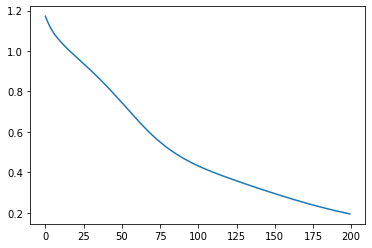

In [46]:
plt.plot(range(epochs),losses)

In [47]:
with torch.no_grad():
    y_eval=model.forward(X_test)